# Topic 3 :  Linear and Nonlinear regression

#### Linear regression is a fundamental supervised machine learning technique used for predicting a continuous outcome variable (also called the dependent variable) based on one or more predictor variables (independent variables). It assumes a linear relationship between the predictor variables and the target variable, meaning that it tries to find a linear equation that best fits the data.

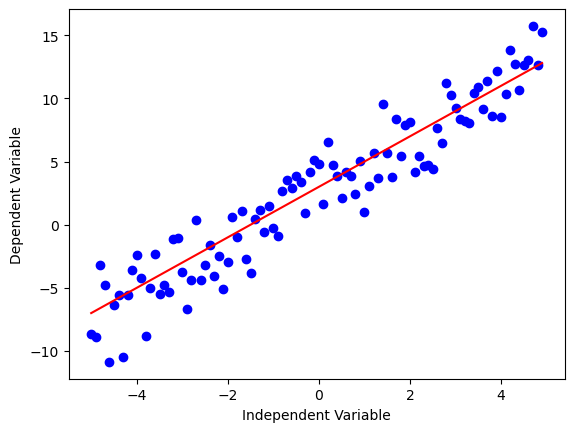

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-5.0, 5.0, 0.1)

# You can adjust the slope and intercept
# to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
# plt.figure(figsize =(8, 6))
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


#### Non-Linear regression is a type of polynomial regression. It is a method to model a non-linear relationship between the dependent and independent variables. It is used in place when the data shows a curvy trend and linear regression would not produce very accurate results when compared to non-linear regression. This is because in linear regression it is pre-assumed that the data is linear. 

Degree: 1, Features: 61
Degree: 2, Features: 1891
Degree: 3, Features: 39711
Degree: 4, Features: 635376
Degree: 5, Features: 8259888


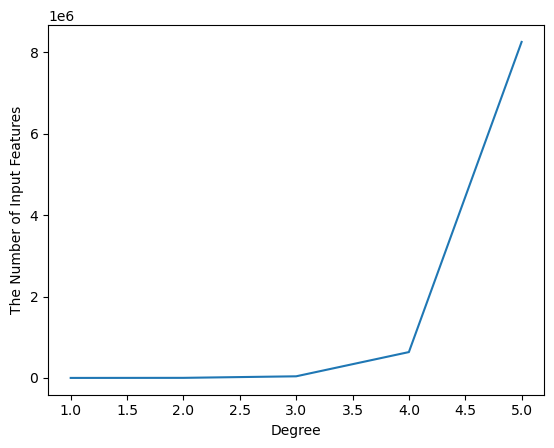

In [62]:
# compare the effect of the degree on the number of created features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

# get the dataset
def get_dataset():
	# load dataset
	url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
	dataset = read_csv(url, header=None)
	data = dataset.values
	# separate into input and output columns
	X, y = data[:, :-1], data[:, -1]
	# ensure inputs are floats and output is an integer label
	X = X.astype('float32')
	y = LabelEncoder().fit_transform(y.astype('str'))
	return X, y

# define dataset
X, y = get_dataset()
# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 6)]
for d in degress:
	# create transform
	trans = PolynomialFeatures(degree=d)
	# fit and transform
	data = trans.fit_transform(X)
	# record number of features
	num_features.append(data.shape[1])
	# summarize
	print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
pyplot.plot(degress, num_features)
plt.ylabel('The Number of Input Features')
plt.xlabel('Degree')
pyplot.show()